Filtering is a process in signal processing to remove some unwanted part of the signal within certain frequency range. There are low-pass filter, which tries to remove all the signal above certain cut-off frequency, and high-pass filter, which does the opposite. Combining low-pass and high-pass filter, we will have bandpass filter, which means we only keep the signals within a pair of frequencies. Using FFT, we can easily do this. Let us play with the following example to illustrate the basics of a band-pass filter. Note: we just want to show the idea of filtering using very basic operations, in reality, the filtering process are much more sophisticated.

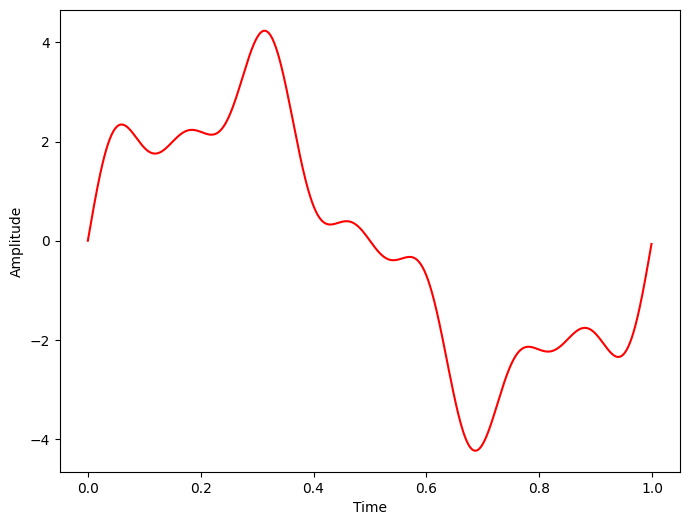

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# sampling rate
sr = 1000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.xlabel("Time")
plt.ylabel('Amplitude')

plt.show()

/Users/hunkim/Github/earth_science/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/hunkim/Github/earth_science/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


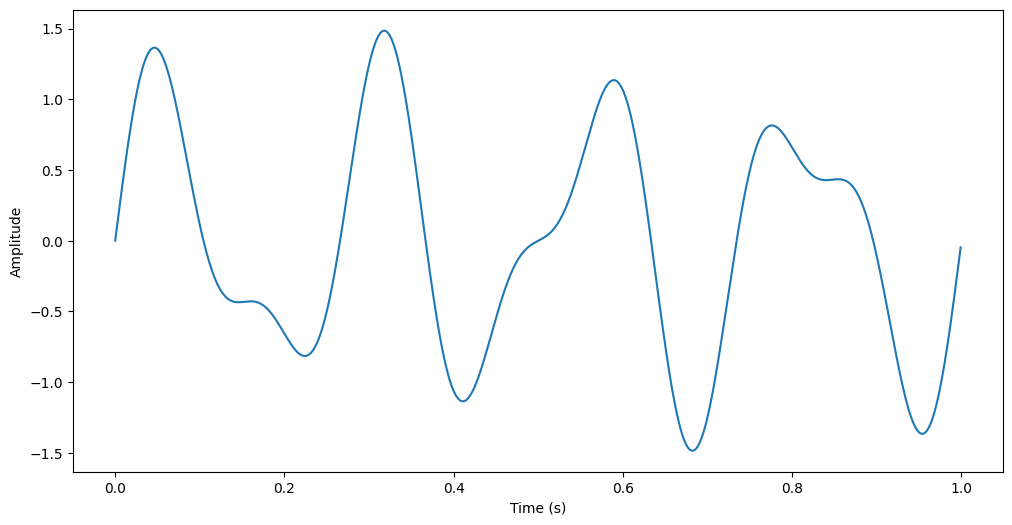

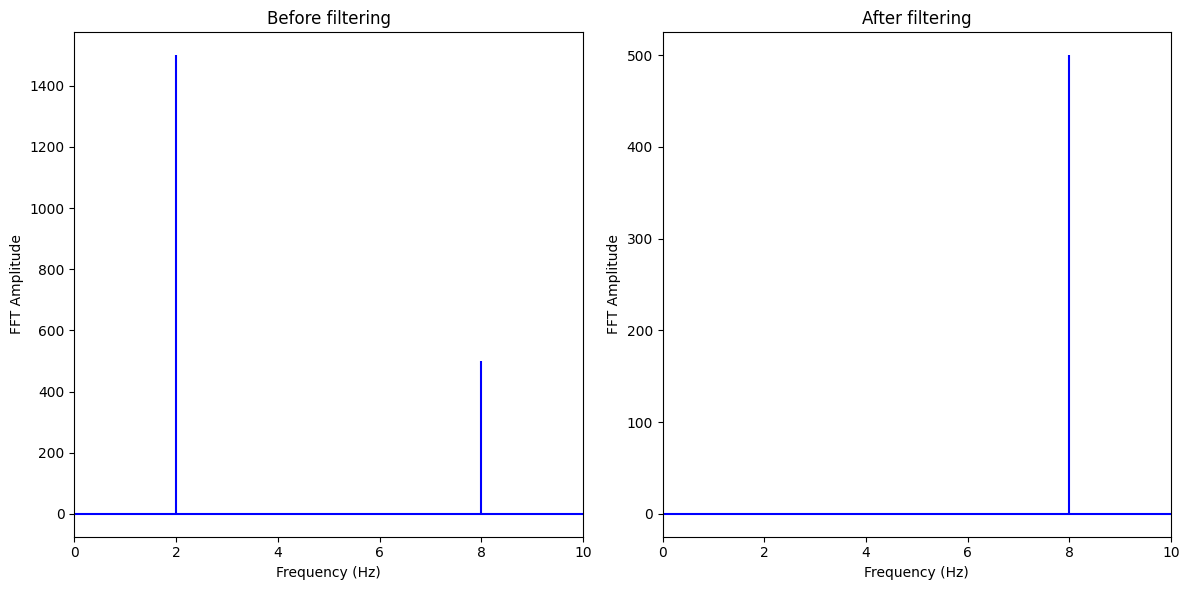

In [3]:
from scipy.fftpack import fft, ifft, fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()